In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load the two data frames
pantheria_df = pd.read_csv('../data/PanTHERIA_1-0_WR05_Aug2008_cleaned.csv', index_col=0)
dad_is_df = pd.read_csv('../data/FAO_DAD-IS_cleaned.csv', index_col=0)

In [3]:
dad_is_df.Specie.unique()

array(['Cattle', 'Chicken', 'Goat', 'Sheep', 'Yak', 'Ass', 'Buffalo',
       'Horse', 'Pig', 'Llama', 'Rabbit', 'Dromedary', 'Duck', 'Goose',
       'Turkey', 'Guinea fowl', 'Dog', 'Alpaca', 'Guinea pig',
       'Bactrian camel', 'Deer', 'Muscovy Duck', 'Muscovy duck',
       'Ostrich', 'Partridge', 'Pheasant', 'Pigeon', 'Quail', 'Vicuna',
       'Cassowary', 'Bactrian Camel'], dtype=object)

No handles with labels found to put in legend.


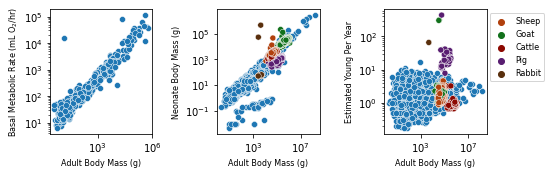

In [4]:
cols2plot_pantheria = ['BasalMetRate (mLO2hr)', 'NeonateBodyMass (g)', 'YoungPerYear_Estimated (number)']
cols2plot_dad_is = [None, 'Birth weight AVG (g)', 'Young per year AVG (number)']

pretty_names_pantheria = ['Basal Metabolic Rate (mL O$_2$/hr)', 'Neonate Body Mass (g)', 'Estimated Young Per Year']
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep,Rabbit'.split(',')
fig, axs = plt.subplots(ncols=3, figsize=(8,2.5))
flat_axs = axs.flatten()
pal = sns.color_palette('dark', n_colors=6)[1:]

xcol_pantheria = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_pantheria) in enumerate(zip(flat_axs, cols2plot_pantheria)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(pantheria_df[xcol_pantheria] > 0,
                          pantheria_df[ycol_pantheria] > 0)
    sub_df = pantheria_df[mask]
    sns.scatterplot(data=sub_df, x=xcol_pantheria, y=ycol_pantheria, legend=False)
    
    ycol_dad_is = cols2plot_dad_is[i]
    if ycol_dad_is:
        mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                              dad_is_df[ycol_dad_is] > 0)
        mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
        sub_df = dad_is_df[mask]
        sns.scatterplot(data=sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                        palette=pal)
    
    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_pantheria[i], fontsize=8)

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/merged_allometries.png', dpi=600, facecolor='w')
plt.show()